In [1]:
import qiskit
from qiskit import *
from qiskit.visualization import *
from qiskit.quantum_info import Operator
import numpy as np

In [2]:
n=6

#data = []

#for i in range(2**(n-1)):
    
    #a = 2**(n-1)-1 - i
    #data.append(a)
    
    
oracle_matrix = np.identity(2**n)

In [3]:
data = [22,23,24,25,26,32,1,2,3,4,21,20,19,18,17,5,6,7,8,27,28,29,30,31,9,10,11,12,13,14,15,16]

y = 17

data[y]

7

In [4]:
def grover_iterations():
    
    grover = QuantumCircuit(6,5)
    inv = QuantumCircuit(6,5)
    amp = QuantumCircuit(6,5)
    it = QuantumCircuit(6,5)

    grover.h(range(6))
    grover.barrier()


    def phase_inversion():
        inv.unitary(Operator(oracle_matrix), range(n), label='invFase')
        inv.barrier()
        return inv

    def inv_about_mean():
        amp.h(range(6))
        amp.x(range(6))
        amp.h(0)
        amp.mct([1,2,3,4,5],0)
        amp.h(0)
        amp.x(range(6))
        amp.h(range(6))
        amp.barrier()
        return amp

    it = phase_inversion() + inv_about_mean()

    grover = grover.compose(it + it + it)


    grover.measure(range(5),range(5))
    
    
    
    return grover


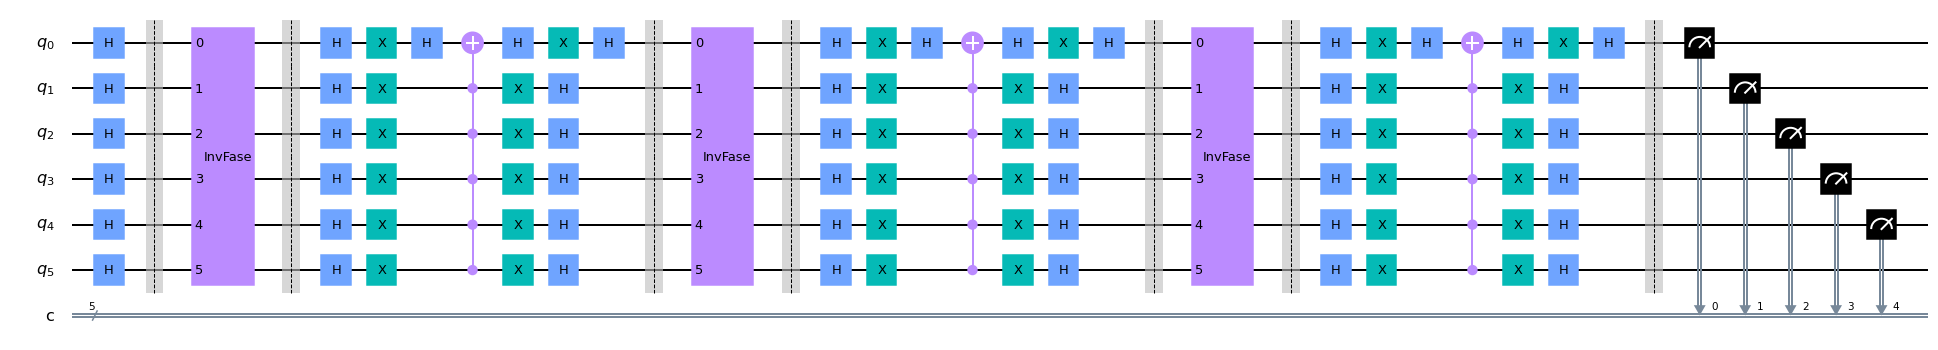

In [5]:
grover = grover_iterations()
grover.draw('mpl', fold=-1)

In [17]:
calc_num_iterations = 22.5*np.sqrt(len(data)) + 1.4*np.log2(len(data))
print(calc_num_iterations)


y = np.random.randint(0, len(data))
print(y)

for k in range(int(calc_num_iterations)):

    data2 = []
    for i in range(2**5):
        if (data[i] < data[y]):
            data2.append(i)

    

    oracle_matrix = np.identity(2**n)
    index = data2
    for j in index:
        oracle_matrix[j,j]=-1


    simulator = Aer.get_backend('qasm_simulator')
    counts = execute(grover, backend=simulator, shots=1).result().get_counts(grover)

    
    for measured_value in counts:
        a=int(measured_value[::1], 2)
    
    if (data[a] < data[y]):
        y=a
  
    print(y)
    


134.27922061357856
12
18
18
18
18
18
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
7
7
7
7
7
7
7
7
7
7
7
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6


In [13]:
# minimum
data[y]

1

In [14]:
data2

[]